In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()

# 1. Data Wrangling

In [2]:
data = []
for year in range(2008,2016):
    file = "./data/movie_list_%s_v2.json" % year
    with open(file, encoding='utf-8' ) as data_file:    
        data += json.load(data_file)
    
df = pd.DataFrame(data)
df.head()

,detail_url,douban_info,movie_tt_id,name,omdb_info
0,http://www.movieinsider.com/m2401/one-missed-c...,{'share_url': 'http://m.douban.com/movie/subje...,tt0479968,One Missed Call,"{'Genre': 'Horror, Mystery', 'Writer': 'Andrew..."
1,http://www.movieinsider.com/m3221/the-pirates-...,{'share_url': 'http://m.douban.com/movie/subje...,tt0475998,The Pirates Who Don't Do Anything: A VeggieTal...,"{'Genre': 'Animation, Adventure, Comedy', 'Wri..."
2,http://www.movieinsider.com/m2828/in-the-name-...,{'share_url': 'http://m.douban.com/movie/subje...,tt0460780,In the Name of the King: A Dungeon Siege Tale,"{'Genre': 'Action, Adventure, Drama', 'Writer'..."
3,http://www.movieinsider.com/m3101/first-sunday/,{'share_url': 'http://m.douban.com/movie/subje...,tt0486578,First Sunday,"{'Genre': 'Comedy, Crime, Drama', 'Writer': 'D..."
4,http://www.movieinsider.com/m1023/teeth/,{'share_url': 'http://m.douban.com/movie/subje...,tt0780622,Teeth,"{'Genre': 'Comedy, Horror, Thriller', 'Writer'..."


In [3]:
# Problem, handling unicode json
df.drop('detail_url', 1, inplace=True)
df.drop_duplicates('movie_tt_id', inplace=True)
df['temp_string'] = df['douban_info'].astype(str)
df.drop_duplicates('temp_string', inplace=True)
df['temp_string'] = df['omdb_info'].astype(str)
df.drop_duplicates('temp_string', inplace=True)
df = df.dropna()
df.drop('temp_string', 1, inplace=True)

In [4]:
df['omdb_info'][0]

{'Actors': 'Shannyn Sossamon, Edward Burns, Ana Claudia Talancón, Ray Wise',
 'Awards': '2 nominations.',
 'Country': 'Japan, USA, Germany',
 'Director': 'Eric Valette',
 'Genre': 'Horror, Mystery',
 'Language': 'English',
 'Metascore': '24',
 'Plot': 'Several people start receiving voice-mails from their future selves - messages which include the date, time, and some of the details of their deaths.',
 'Poster': 'http://ia.media-imdb.com/images/M/MV5BMjA2NTk0OTcyMV5BMl5BanBnXkFtZTcwMzk1MDU1MQ@@._V1_SX300.jpg',
 'Rated': 'PG-13',
 'Released': '4 Jan 2008',
 'Response': 'True',
 'Runtime': '87 min',
 'Title': 'One Missed Call',
 'Type': 'movie',
 'Writer': 'Andrew Klavan (screenplay), Yasushi Akimoto (novel), Minako Daira (screenplay)',
 'Year': '2008',
 'imdbID': 'tt0479968',
 'imdbRating': '3.9',
 'imdbVotes': '24943'}

In [5]:
df['douban_info'][1]

{'aka': ['蔬菜海盗历险记', '无所事事的海盗'],
 'alt': 'https://movie.douban.com/subject/1939774/',
 'casts': [{'alt': None, 'avatars': None, 'id': None, 'name': 'Phil Vischer'},
  {'alt': None, 'avatars': None, 'id': None, 'name': 'Mike Nawrocki'},
  {'alt': 'https://movie.douban.com/celebrity/1076005/',
   'avatars': {'large': 'http://img6.douban.com/f/movie/63acc16ca6309ef191f0378faf793d1096a3e606/pics/movie/celebrity-default-large.png',
    'medium': 'http://img6.douban.com/f/movie/8dd0c794499fe925ae2ae89ee30cd225750457b4/pics/movie/celebrity-default-medium.png',
    'small': 'http://img6.douban.com/f/movie/ca527386eb8c4e325611e22dfcb04cc116d6b423/pics/movie/celebrity-default-small.png'},
   'id': '1076005',
   'name': 'Cam Clarke'},
  {'alt': None, 'avatars': None, 'id': None, 'name': 'Laura Gerow'}],
 'collect_count': 809,
 'comments_count': 121,
 'countries': ['美国'],
 'current_season': None,
 'directors': [{'alt': None,
   'avatars': None,
   'id': None,
   'name': 'Mike Nawrocki'}],
 'do_coun

In [6]:
# Data problems
# 1.['imdb_info']['imdbRating'] do not exist
# 2.['imdb_rating'] is 'N/A', at id 108, 273
# 3.['imdb_rating'] is '23,421', need to get rid of the comma

df['imdb_rating'] = df['omdb_info'].apply(lambda x: x.get('imdbRating', np.nan))
df['metascore'] = df['omdb_info'].apply(lambda x: x.get('Metascore', np.nan))
df = df.dropna()
df = df[(df.imdb_rating != 'N/A') &(df.metascore != 'N/A')]

df['year']=df['omdb_info'].apply(lambda x: x.get('Year', np.nan))
df['year'] = df['year'].astype(float)
df['imdb_ratings_count'] = df['omdb_info'].apply(lambda x: int(x['imdbVotes'].replace(',', '')))
df['imdb_rating'] = df['imdb_rating'].astype(float)
df['imdb_ratings_count'] = df['imdb_ratings_count'].astype(float)
# df['name'] = df['name'].apply(lambda x: x.encode('ascii','ignore'))
df['metascore'] = df['metascore'].astype(float)
df['metascore'] = df['metascore']/10
df['genre']=df['omdb_info'].apply(lambda x: x.get('Genre', 'none'))
df['country']=df['omdb_info'].apply(lambda x: x.get('Country', 'none'))
# df['image_url']=df['omdb_info'].apply(lambda x: x.get('Poster', 'none'))

df['name'] = df['douban_info'].apply(lambda x: x['title'])
df['db_rating'] = df['douban_info'].apply(lambda x: x['rating']['average'])
df['db_ratings_count'] = df['douban_info'].apply(lambda x: x['ratings_count'])
df['image_url']=df['douban_info'].apply(lambda x: x['images']['large'])
df['douban_url']=df['douban_info'].apply(lambda x: x['alt'])
df['douban_year']=df['douban_info'].apply(lambda x: x['year'])

df.drop('douban_info', 1, inplace=True)
df.drop('omdb_info', 1, inplace=True)

In [7]:
df['year'].value_counts()

2011.0    428
2012.0    406
2010.0    385
2013.0    354
2009.0    350
2014.0    332
2008.0    289
2015.0    244
2007.0     58
2006.0     10
2004.0      4
1999.0      3
1994.0      2
1954.0      1
1982.0      1
1962.0      1
1978.0      1
1981.0      1
2001.0      1
1987.0      1
1992.0      1
1993.0      1
1995.0      1
2003.0      1
1939.0      1
Name: year, dtype: int64

# 2. Movie Overview

In [8]:
df.describe()

,imdb_rating,metascore,year,imdb_ratings_count,db_rating,db_ratings_count
count,2877.000000,2877.000000,2877.000000,2.877000e+03,2877.000000,2877.000000
mean,6.366076,5.440702,2011.135210,5.529182e+04,6.078971,20429.224192
std,0.986817,1.731714,3.271256,1.066455e+05,2.287845,49445.858525
min,1.600000,0.100000,1939.000000,1.000000e+01,0.000000,0.000000
25%,5.800000,4.200000,2009.000000,2.894000e+03,5.800000,264.000000
50%,6.400000,5.500000,2011.000000,1.369500e+04,6.600000,2609.000000
75%,7.100000,6.700000,2013.000000,5.838100e+04,7.400000,13871.000000
max,9.000000,10.000000,2015.000000,1.451699e+06,9.500000,586362.000000


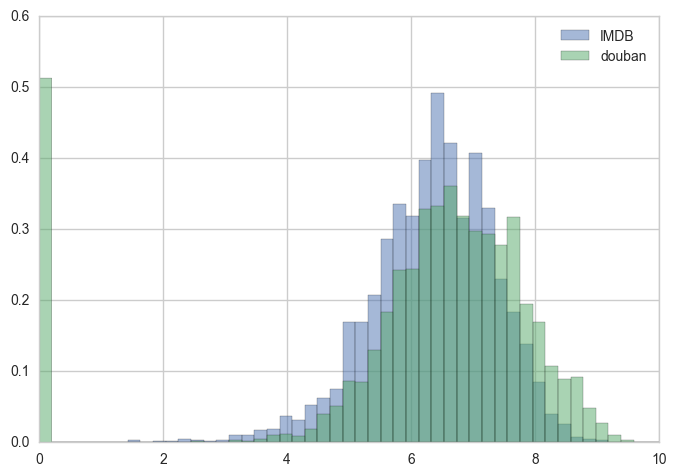

In [9]:
bins=linspace(0,10)
df['imdb_rating'].hist(bins=bins, alpha=0.5, normed=True, label = 'IMDB')
df['db_rating'].hist(bins=bins, alpha=0.5,  normed=True, label = 'douban')
plt.legend()

可以发现，有的电影豆瓣电影没有分数。应该把这些去掉

（可以看看这些电影是什么样的）

## 2.1 Empty Score Moives

In [10]:
empty_df = df.query('db_rating == 0')
display(empty_df.describe())
fig=plt.figure()
empty_df['imdb_rating'].hist(bins=arange(-0.05,10,0.1), alpha=0.5)
plt_configure(title='No Douban rating, IMDB Rating Distribution',figsize=(3,2))
fig=plt.figure()
empty_df['imdb_ratings_count'].hist(bins=50)
plt_configure(title='No Douban rating, IMDB Rating Count Distribution', figsize=(3,2))
align_figures()

,imdb_rating,metascore,year,imdb_ratings_count,db_rating,db_ratings_count
count,301.000000,301.000000,301.000000,301.000000,301.0,301.000000
mean,6.053488,5.177741,2011.202658,716.295681,0.0,7.504983
std,1.132503,1.634035,2.404605,1150.110720,0.0,6.484659
min,2.300000,0.900000,1987.000000,10.000000,0.0,0.000000
25%,5.400000,4.000000,2010.000000,185.000000,0.0,2.000000
50%,6.200000,5.300000,2011.000000,427.000000,0.0,6.000000
75%,6.900000,6.500000,2012.000000,801.000000,0.0,13.000000
max,9.000000,8.600000,2015.000000,13492.000000,0.0,27.000000


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAVUAAADWCAYAAABhXxHsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzt3XdcE/f/B/BX2MgSkOUqav3KUJAi4J6oddd+29pqXV+V
alHq11HBvcVVHCiC1EltsVpr3VZr1a9FsVhnXYCgosgQGRISEu73R3655kgCCUQuwffz8eARcvN9
I+/cfe5ybwHDMAwIIYTohBHfARBCSH1CSZUQQnSIkiohhOgQJVVCCNEhSqqEEKJDlFQJIUSHKKkS
QogOUVIlhBAdoqRKCCE6pFVSHT16NLy9vXHnzh2V/Xv37o2IiIhaB9W7d294eHiwf15eXggICMDI
kSNx+PDhWk9fnc2bN8PDw+ONTf9NEovFWLVqFY4ePcp2i4iIQJ8+fXiLafTo0RgzZgz7Pjo6Gh4e
HvD19cXr169VjvP999/Dw8ODE3dERARnf/D09ISfnx+GDBmCLVu2QCQScaZReXgPDw/4+/tjxIgR
+PXXX6uNu/L+J98HAwMDMWrUKFy8eFHrdfHbb79hzpw57Pvk5GR4eHjg6tWrWk9LW/J5Kf61a9cO
3bt3x8yZM5GWlsYZ/tChQ/D09MSzZ880mn5xcTHmzJmDP//8s8rhsrKy4OHhgZ9//hkA8NNPP8HD
w0Pj+VSFz/VbmYm2I1RUVCA8PByHDh2CiYnWo2usZ8+e+PLLLwEAEokEL1++xIkTJzBnzhzcu3eP
swJ1RSAQQCAQ6Hy6dSE3Nxe7d+9GZGQk2+3LL7/E2LFjeYxKNYlEgnPnzmHw4MFK/Y4fP65yGzg5
OWHLli0AZPtgcXEx/vzzT8TGxuLSpUvYtWsXzMzM1A5fWFiIo0ePIiwsDDt27ECnTp2qjFFx/5PH
/PjxY8TGxuLLL7/EgQMH0KZNG42XeefOnZzl8vb2xv79+9GqVSuNp1EbAoEAixYtgpeXFwCgrKwM
jx8/Rnx8PD766CPs3r0bPj4+AGTLnpiYCCcnJ42mfffuXRw+fBgfffRRlcM5OTlh//79aNasGRuT
rj5vfK9fRVpnRRsbG6SmpiI6OhrTp09/EzEBAOzt7dmNLBccHAwnJyfs2rUL/fr1g5+f3xubv6FR
9QgH+c6rb9577z2cOHFCKanm5OQgJSUFnp6eKCws5PQzMzNT2h+6desGHx8fhIaGYufOnfjiiy+q
HL5Hjx64du0aEhMTq02qqva/9957Dz4+Phg4cCCOHDmiVVKtzMrKSmn6b1qrVq048wwMDMT777+P
4cOHIzw8HMeOHYNAIIC9vT3s7e01ni7DMBolR1Xb5E3hY/3Kad2m6uHhgQ8++ADx8fH4+++/qxy2
oqIC3333HYYMGQJfX1/06tUL69evh1gsrnHAU6dOhZmZGX744Qe2m1gsxpYtWzBgwAD4+Pigf//+
2L59OyfRqGqaUHf6cebMGfTv3x8+Pj745JNPkJSUxOl///59TJs2DZ06dULbtm3RvXt3LF++nLNc
Hh4e2LdvH+bPn4+goCC89957mD59Ol6+fKl22eSnR7t27cKAAQPg5+eHQ4cOsTGNGjUK7733Htq1
a4cBAwbgu+++Y8cLDg6GQCBAeHg4e+ocHh6O3r17c9bB5s2bsWbNGnTp0gW+vr6YOHEiMjMzOXEc
OnQIgwYNgo+PDz744AMkJSXB29ubPW2rDYFAgAEDBuDixYtKTQAnT55Ey5YttUpWffr0Qfv27Tn7
Q1VsbGxqdXRkY2MDAJxpZGVl4euvv0a3bt3Qtm1bdO7cGXPmzGG/GEaPHo2rV68iOTkZnp6e7P+K
p6fR0dHo168fzp8/j6FDh6Jdu3bo37+/UnNXeno6Jk2aBH9/f3Tt2hVRUVGYO3cuRo8eXaPlsba2
xsSJE/Ho0SNcuXIFgPLn4uXLl5g5cya6du3K7hPyfSE5OZk9G1Js7hk9ejRmz56NsLAw+Pn5YcKE
CUqn/3IpKSkYPnw42rVrhyFDhuD48eNsP3Wn8ZXnVd36BYBbt25h4sSJCAoKgr+/PyZPnozU1FSl
eSUlJWHChAlo3749unbtinXr1qk8aFGnRheq5s6dC3t7e0REREAikagdbsGCBYiMjET//v2xbds2
fP7550hISOCcVmnL2toaPj4+SElJYbt98cUX2LFjB0aMGIHY2Fi8//772LBhAxYtWlTltFSdfjAM
g/nz52PcuHHYvHkzrK2tMWnSJLYdOTc3F6NGjYJQKERkZCS2b9+OQYMGISEhAbt37+ZMa8OGDaio
qEBUVBTmzJmDc+fOYcWKFdUuY3R0NEJCQrBmzRp07twZv//+O6ZOnYp27dohJiYG0dHRaN68OZYv
X46bN2/C2dkZ0dHRYBgGX375JXvaq2r59uzZg/T0dERGRmLFihW4ffs2pynl559/RkREBPz9/RET
E4P+/fsjNDQUFRUV1catqffffx9SqRTnzp3jdD9+/DgGDRqk9fS6dOmC7OxsPH/+nNNdKpVCKpVC
IpHg1atX2LNnD1JTUzFy5EiNpisfXyqVoqysDHfv3sXXX38NU1NTNs6ysjKMHj0ajx49wuLFi7Fj
xw6MHTsWx44dQ1RUFABg8eLF8PLygpeXFxITE9lT8MrbJjc3F8uWLcO4ceMQFxeHpk2bIjw8HI8e
PQIAFBQUYNSoUcjOzsbq1asxb948nDp1CkePHq3VF0WXLl3AMAz7maq838yePRuPHj3C0qVLER8f
Dy8vL0RERCA5ORne3t5YuHAhu5yKn7kTJ07A2toaMTExmDhxosp5MwyDhQsXYuDAgYiJicG//vUv
zJgxA2fPnmWHqW7ZNFm/ly9fxmeffQaBQMDu+9nZ2fj000/Z9au4vB06dEBsbCyGDBmC+Ph4/Pjj
j5qsSgA1OP0HZN/WS5cuxZQpU7BlyxZ89dVXSsOkpqbi4MGDmDVrFrtCO3XqBCcnJ3z99de4cOEC
unfvXpPZo1GjRrh16xYA4Pz580hKSkJUVBQGDBjAzsfCwgKbNm3C2LFjtWpXEQgEWLZsGfr27ctO
q0+fPoiLi8PGjRvx4MEDeHp6YvPmzbC0tGSHuXTpEpKTkzFp0iR2Wm3atMHKlSvZ9zdu3MCpU6eq
jWHgwIEYPnw4+/7o0aP48MMPER4eznZr3749goKCcOXKFfj4+MDT0xMA0Lx58yovttnZ2SEmJobd
4TIzMxEdHY3CwkLY2dlh06ZN6NOnD5YuXQpA9oEzNjZmE4QuODg4ICAggNMEkJWVhZs3b2Lt2rXY
unWrVtNr1KgRAFlScnNzY6fn7e3NGU4gEOCzzz5DQEBAtdM8dOgQe5YgZ2Jignbt2mHnzp3sOs7I
yEDjxo2xevVqNGnSBIDstPr69etITk4GIDvttrKygkAg4JySVj76KSsrw4oVKxAUFAQAcHd3R69e
vXD+/Hm0aNECe/bsgVAoxM6dO9ll9vX1Rf/+/TVbUWrI207z8vJU9r969SqmTp3KnvUEBgbC3t4e
ZmZmsLKywrvvvssup+JnzdTUFEuWLIGpqSkA2TZR5auvvsK4ceMAAF27dsWjR48QExOj8UVWTdbv
+vXr0aJFC8TFxbH7fpcuXRAcHIxNmzZx9u8RI0ZgypQpAICgoCD8+uuvOHfuHD755BON4qnxlaZe
vXph6NCh2L59O/r168d+qOWSk5MhEAiUjjwGDRrEfsvVNKkqtuEkJyfDxMQE77//PmeYoUOHYuPG
jUhOTtYqqZqYmLAJFZC1A3Xv3h2///47ANmG6NKlCyQSCdLS0pCZmYkHDx7g5cuXSu1Qvr6+nPeu
rq4QCoXVxlD59HfChAkAgNLSUjx69AiZmZm4ffs2AGjdlNKuXTvON7irqysAQCgUorCwEM+ePVNq
Kx88eDC++eY

In [11]:
# these 2 table can be combined with an interactive table sorting
# empty_df.sort_values(by='imdb_rating',ascending=False).head()

In [12]:
empty_df.sort_values(by='imdb_ratings_count',ascending=False).head()

,movie_tt_id,name,imdb_rating,metascore,year,imdb_ratings_count,genre,country,db_rating,db_ratings_count,image_url,douban_url,douban_year
1964,tt1520498,气球大冒险,7.2,3.2,2012.0,13492.0,"Adventure, Family",USA,0.0,0,http://img3.douban.com/lpic/s9066428.jpg,http://movie.douban.com/subject/4067243/,2012
2935,tt2967006,意大利之旅,6.7,7.5,2014.0,8567.0,"Comedy, Drama",UK,0.0,11,http://img3.douban.com/view/movie_poster_cover...,http://movie.douban.com/subject/25864254/,2014
285,tt0886539,偶然运气,7.1,5.8,2009.0,6528.0,Drama,India,0.0,22,http://img6.douban.com/lpic/s3830167.jpg,https://movie.douban.com/subject/3345508/,2009
227,tt0479162,特殊病人,7.0,5.7,2006.0,4707.0,"Comedy, Drama, Sci-Fi",USA,0.0,6,http://img3.doubanio.com/lpic/s3339437.jpg,https://movie.douban.com/subject/3278714/,2006
854,tt1396557,温尼贝戈人,7.2,7.1,2009.0,3564.0,"Documentary, Biography, Comedy",USA,0.0,12,http://img3.douban.com/lpic/s4396761.jpg,http://movie.douban.com/subject/3794525/,2009


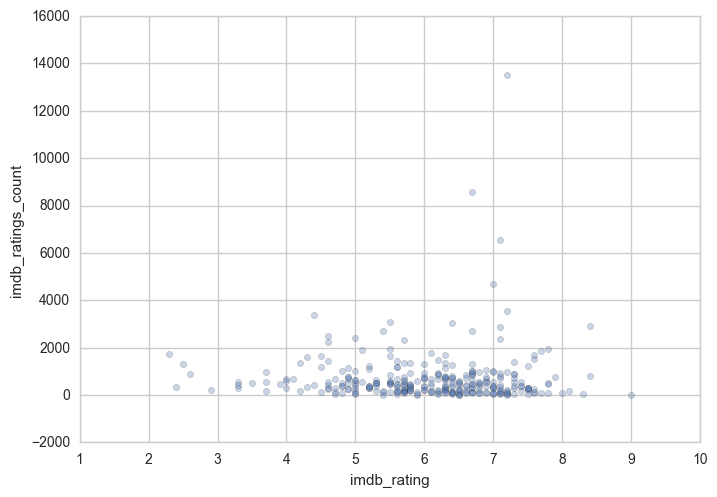

In [13]:
empty_df.plot(kind='scatter', x='imdb_rating', y='imdb_ratings_count', alpha=0.30)

## 2.2 Delete Empty movies, Go ahead

In [14]:
df = df.query('db_rating > 0')

# 3. Movie Overview (两种评分都有的)

## 3.1 Overall Info

In [15]:
df = df.query('year > 2005')
df.describe()

,imdb_rating,metascore,year,imdb_ratings_count,db_rating,db_ratings_count
count,2558.000000,2558.000000,2558.000000,2.558000e+03,2558.000000,2558.000000
mean,6.391947,5.454339,2011.294371,5.923143e+04,6.779359,22205.444097
std,0.955411,1.729473,2.253346,1.042790e+05,1.006477,50382.470114
min,1.600000,0.100000,2006.000000,1.580000e+02,2.600000,20.000000
25%,5.800000,4.200000,2009.000000,4.831000e+03,6.100000,657.000000
50%,6.500000,5.500000,2011.000000,1.829000e+04,6.800000,3601.500000
75%,7.100000,6.700000,2013.000000,6.670125e+04,7.500000,16849.750000
max,9.000000,10.000000,2015.000000,1.451699e+06,9.500000,586362.000000


In [16]:
df['year'].value_counts()

2011.0    363
2010.0    343
2012.0    337
2009.0    326
2013.0    316
2014.0    308
2008.0    274
2015.0    231
2007.0     53
2006.0      7
Name: year, dtype: int64

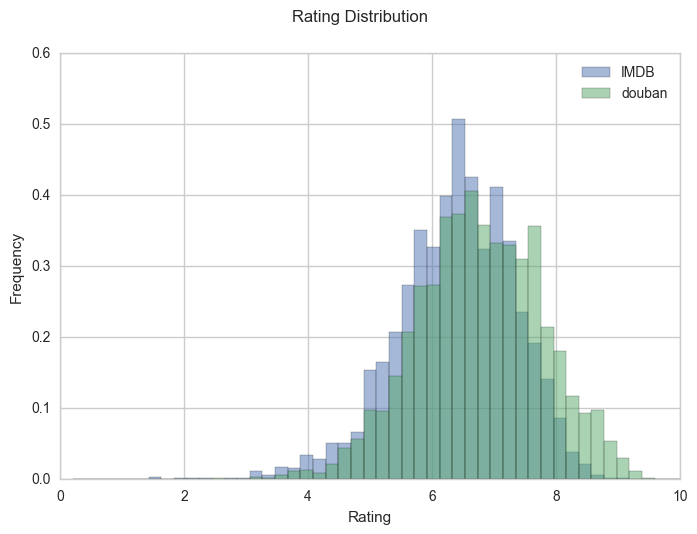

In [17]:
# 1. Why douban is higher?
# 2. Why the std is close to 1? (but IMDB < Douban, indicating a narrower distribution)
bins=linspace(0,10)
df['imdb_rating'].hist(bins=bins, alpha=0.5, normed=True, label = 'IMDB')
df['db_rating'].hist(bins=bins,alpha=0.5,  normed=True, label = 'douban')
plt_configure(xlabel='Rating',ylabel='Frequency', title='Rating Distribution', legend=True)

1. 两者大致分布正态分布，可以认为样本量基本足够
2. 这不是标准的正态分布，有偏度。原因？
3. 豆瓣电影偏高（相对有移动了）

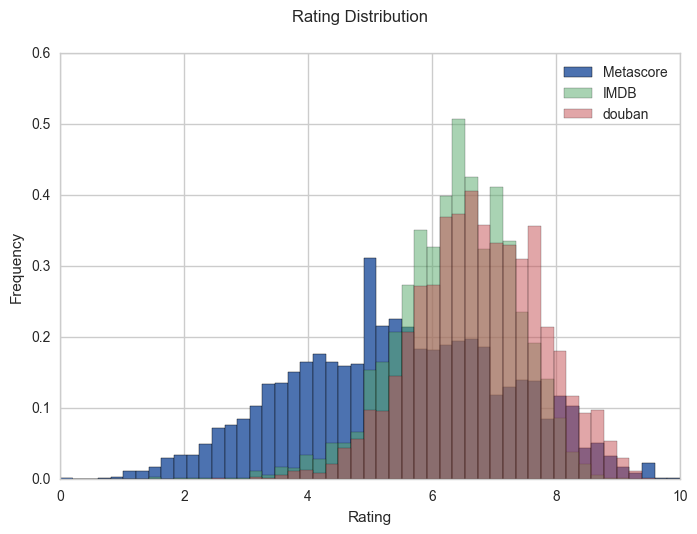

In [18]:
df['metascore'].hist(bins=bins, normed=True, label = 'Metascore')
df['imdb_rating'].hist(bins=bins, alpha=0.5, normed=True, label = 'IMDB')
df['db_rating'].hist(bins=bins,alpha=0.5,  normed=True, label = 'douban')
plt_configure(xlabel='Rating',ylabel='Frequency', title='Rating Distribution', legend=True)

并不是所有的影评分布都会类似. 比如Metascore的分布，就大为不同

Metascore的分数经过了人工的调整、加权，所以分布差别很大

## 3.2 Good Movies

Any your favorite?

### 3.2.1 Order by IMDB Rating

In [19]:
# Good Movies
# display(df.sort_values(by='imdb_rating',ascending=False).head(5))
movie_list(df.sort_values(by='imdb_rating',ascending=False))

### 3.2.2 Order by Douban Rating

In [20]:
movie_list(df.sort_values(by='db_rating',ascending=False))

## 3.3 Scatter Comparison

scatter,可以非常直观的比较两者的差别

 
0.7497 x + 1.309


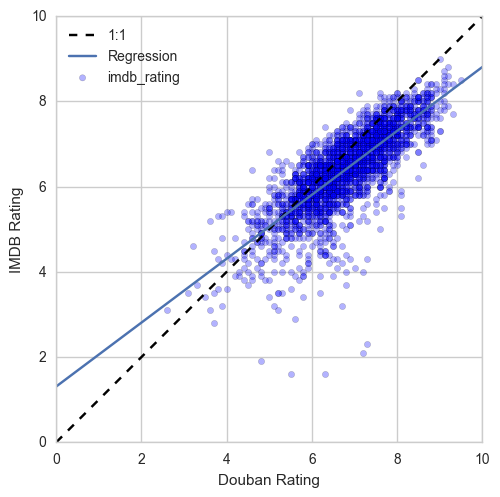

In [21]:
fig, fit_fn , scatter_plot = plot_movie_scatter_comparison(df, title='', type='rating')
print(fit_fn)

In [22]:
turn_scatter_into_interactive(fig, scatter_plot, df, 'movie_compare_all.html')

对比回归线，可以看到
1. 并不是1:1的关系，斜率不同（原因？可能是打分制？），而且分数越高，差别越大

    - IMDB: 10星制。没有人会打10星  
    - 豆瓣：5星制。4星以上都会打5星
    
    豆瓣的打分制概念简单，不需要太精确，体验更好。

2. IMDB比豆瓣要齐整得多。豆瓣确实有一些电影，偏离回归线较大[(4,6)附近]

3. Play with the scatter, 发现“打分人数”的问题

## 3.4 Rating Number Problem

In [23]:
for min_ratings_number in [0, 1000,3000,5000,10000, 20000,40000]:
    min_ratings_number = min_ratings_number
    temp_df = df.query("(db_ratings_count > @min_ratings_number) & \
                   (imdb_ratings_count > @min_ratings_number)")
    title = 'Min Rating: ' + str(min_ratings_number) + ' N:' + str(len(temp_df))
    fig, fit_params, _ = plot_movie_scatter_comparison(temp_df, title=title, type='rating')
    fig.set_size_inches(2.5,2.5)
    fig.show()
    print(min_ratings_number, fit_params[1], len(temp_df))
align_figures()

D:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0 0.749742177888 2558
1000 0.771272617771 1782
3000 0.774075473795 1342
5000 0.787298429093 1105
10000 0.791443120593 796
20000 0.77791662193 544
40000 0.764728609319 347


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQsAAAEWCAYAAABxHbIXAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzsnXd4VFX+/193+iSTHtIrSUgBQkILRUBpSnF11W26uuvi
rnVVdHVxrevqV1dd/LmKriuWdatYV0RAVIpoKAKhhlTSQ/okmZlMv78/zmQgFEkwQHDv63nyTObO
veeeucl9308750iyLMsoKCgonALVue6AgoLC+YEiFgoKCv1CEQsFBYV+oYiFgoJCv1DEQkFBoV8o
YqGgoNAvFLFQUFDoF4pYKCgo9AtFLBQUFPqFIhb94NprryUrK4uf/OQnJ91n8eLFZGVlcd999/m3
ZWVl8cILL3yrc2/bto2srKzjfkaPHs2MGTP47W9/S2tr64DadDqdPPHEE3z00Uf+bffddx+zZs36
Vn39tvztb39j7ty5jBkzhiuuuIKNGzd+4/719fVkZWVx1VVX4fV6j/u899pt3779G9spLCzk2muv
ZeLEiVxwwQXcfvvt1NbW9tnn2WefPe5vkJ2dzeuvv96nnRP9rW666aY+ba1YsYKFCxeSn5/P/Pnz
+ec//3mqSzMk0JzrDpwvqNVqdu/eTVNTE9HR0X0+6+npYcOGDUiS1Gf7ihUrjtv3dJAkiYcffpic
nBz/NqvVyo4dO3j55Zepqqrirbfe6nd7LS0t/O1vf+PJJ5/0b7vlllv42c9+9q37erq8/vrrPPPM
M/z6179m5MiRvPPOO9xyyy38/e9/Z+zYsd947P79+3nllVe48cYbj/vs2L/JsezYsYMbbriB2bNn
88wzz9DT08OyZcv4yU9+wkcffURoaCgAJSUlFBQUcPfdd/c5Pi4uzv97cXExQUFBvPrqq332CQ4O
9v/+9ttv89BDD3Hdddcxc+ZMvv76ax577DFcLhc///nPv7Gv5xpFLPpJTk4O5eXlrFmz5ribav36
9RiNRkJCQvpsz83NHbTzp6WlHdfe5MmTcTgcLF++nIqKCtLS0vrV1omGAyUmJg5KP08Hh8PBSy+9
xKJFi/xP4WnTpvHjH/+YZcuWHXfzHUtwcDDLli1j9uzZ/b4GvSxfvpz09HSee+45/7b8/HwuvPBC
3n//fa6//npACMGVV175jX/T4uJiMjMzv3Gfd999l/Hjx/O73/0OgEmTJnHo0CH+8Y9/DHmxUNyQ
fmI0GpkxYwZr1qw57rOPP/6YSy65BJWq7+U82g3pNYkLCwtZtGgReXl5XHDBBTzzzDMnvHn7S1BQ
END3Cfrpp59yzTXXMHbsWEaPHs28efP8pm59fT2zZ89GkiSWLFnidz2WLFnCzJkz/W3MnDmT559/
nqeeeoqpU6cyZswYbrjhBqqrq/uc//3332fBggXk5uZy+eWXU1hYyMiRI/nggw/6XIej3bNj2b17
N93d3cyePbvP9jlz5rB161acTuc3XoMbb7wRk8nEkiVLTnktZ86cyXXXXed/n5eXd5z4R0VFERQU
RE1NDQAdHR00NTWRnZ39jW0fPHiQrKysb9zH6XRiMpn6bAsJCcFsNn/jcUMBRSwGwPz58ykqKqKp
qcm/zWKxsGnTJhYsWNCvNu655x7Gjx/Pyy+/zKWXXsry5ct5++23T3mcx+Pp89PZ2cnatWt59dVX
GTNmDMOHDwdgw4YN3HbbbYwePZqXXnqJF154gaSkJB577DH27NlDVFQUL7zwArIsc8stt7Bs2TJA
iM2xJvubb75JZWUlTz75JI8//jj79u3jt7/9rf/zDz74gPvuu49x48bx0ksvcfHFF3PrrbceFz9Y
sWIFt9xyy0m/W0VFBQApKSl9ticnJ+PxePw37ckIDw/nwQcfZO/evbzyyivfuO+LL77Iww8/7H9/
4403csUVV/TZZ9u2bXR2dpKRkQEIiwHg888/Z+bMmYwaNYrvf//7bNq0yX+M0+nk0KFD1NXVcfnl
lzNq1ChmzpzJa6+91qft6667js2bN/Phhx9isVj44osv+OCDD7j88su/sd9DAcUNGQAzZszAaDT2
cUXWrVtHZGQk48aN61cbP/rRj7j55psBKCgoYN26daxfv54f/vCHJz1GlmWuv/76456aISEhzJ49
m9/85jf+bRUVFVxxxRUsWbLEvy0vL4+CggK2bt1Kbm6u/wmZlJT0jU/CkJAQXnrpJb+IVFdX88IL
L9DZ2UlISAh//vOfmTVrFo8++igAU6dORa1W8+yzz/Zp51TuWHd3N8BxT9zAwEBACPKpmDdvHqtX
r2bZsmXMmjXrpO7IqZ78HR0dPPjgg8TExPhv4IMHDyJJEm1tbTz++OM4nU7+/ve/c9NNN/HKK68w
depUSktLcbvdVFdXs3jxYoKDg/nss894+umn6erq4s477wRgwYIFbN26lXvvvdd/zmnTpn2j5TVU
UMRiAOj1ei666KI+YvHxxx8zf/78frcxZsyYPu9jYmLo6ek55XGPPvooOTk5eDwePvvsM1599VWu
vfZabrvttj77LVq0CACbzcahQ4eorq5m3759AKc0549l9OjRfayNmJgYQAR0Ozs7aWho8N8EvSxc
uJClS5cO6Dynch2Ode9OxiOPPML8+fO57777BhTw7aW5uZlFixbR2trKG2+8QUBAACAsyrS0NKZP
n+6/HlOnTuWyyy7jz3/+M1OnTiUlJYVXXnmFUaNGERYWBoh4hN1u57XXXuOGG27AZDJx8803s2vX
Ln77298yevRoSkpKeP7557n99tv9Vt5QRRGLATJ//nx+/etf09TUhF6vp7CwkLvuuqtfx0qShNFo
PG7bidJ+x+6TkpLCyJEjAfGk1mq1vPDCCxgMBm644Qb/vh0dHTz00EN89tlnqFQqkpOT/VbPQGMj
BoOhz/vem9br9dLe3g5AREREn30iIyMHdA44YlFYrVZ/DAaOWBTHWhwno9cdufvuu1m+fDljxozp
93cuKSnhpptuwmaz8eqrrzJ69Gj/ZzExMX6h7EWj0TB16lS/KJlMJqZNm3ZcuzNmzOCdd96hsrIS
j8fD5s2befzxx7nyyisBGD9+PAkJCdx4441s3LiRGTNm9Ku/5wIlZjFApk2bRkBAAGvXrmXdunUk
JCScMvB1Jrj55pvJysriueeeo7y83L/97rvvZv/+/bz55pvs2rWLVatW+SPvg0nvzXNsjUdbW9uA
2+qNtxwbPK2urkar1Q4oU7NgwQJmz57NCy+8QEVFxSlTpwBbtmzhmmuuQZIk/vWvf5GXl9fn840b
N/LJJ58cd5zdbic8PBwQcY1///vfx+3jcDgACAsLo6GhAUmSyM/P77PPhAkTACgrK+vflzxHKGIx
QHQ6HbNnz2bNmjWsXr2ahQsXnpN+qNVqHnnkEdxuN4899ph/+86dO5k7dy7jx49Hq9UC+Iubep+y
arX6W58/JiaGpKQkPv300z7b165d268b9Gjy8/MxGAysXbu2z/Z169YxceJE//foL7///e8xGAz9
cocOHDjAzTffTFxcHCtWrDhhrGPt2rXcd999dHV1+bfZbDY2btzIpEmTAGGZ/P73v6ewsLDPsatW
rSIuLo7ExESGDx+OLMvs2LGjzz6975OSkgb0Pc82ihtyGsybN4+bbroJtVrNgw8+2O/jTjdFerLj
8vLy+N73vsd///tf1q5dy8UXX8zo0aNZuXIlOTk5xMTEsGPHDv7617+iUqmw2WzAEbO+sLCQ4cOH
n3Y9yO23384999zDI488wpw5cyguLubFF18E+qZyd+/eTXh4+EktBIPBwKJFi3jxxRfRaDTk5+fz
zjvvsH//fv7xj38MuF8RERE88MAD3HPPPccJV3FxMTqdzi8K999/P263m1//+tfU19dTX1/v37e3
z4sWLWLNmjX

对比上面这几张图，可以发现随着评分人数的增加，偏离逐渐收窄，但并不迅速收窄

一直到4W人以上，豆瓣和IMDB才算均衡。也就是说，
- 部分电影的偏离，确实是由于看的人很少，打分不客观引起（打分样本过少）
- 部分偏离的电影，是有相当一部分人观看的 （>3K），这个现象确实存在

### 3.4.1 Ratings Number Distribution (Optional)

In [24]:
# This plot is not very informative, what can I do?
# Why is this kind distribution? -> Poisson
fig=plt.figure()
df['imdb_ratings_count'].hist(bins=50, alpha=0.5, figsize=(4,3))
plt_configure(title='IMDB', xlabel='rating_number', ylabel='Frequency')
fig=plt.figure()
df['db_ratings_count'].hist(bins=50, alpha=0.5, figsize=(4,3))
plt_configure(title='Douban', xlabel='rating_number', ylabel='Frequency')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAaIAAAFBCAYAAAA126tDAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzt3XtcVHXiPvCH6wABitxFDEOFQWEGEM0UXd02E0Es0lbN
RF35majdLC1LwstialkLkqRrGn5bUchM18Wv1bZtaqsCAgam4BcF5GqioMMMl/P7o/XkCCoMo+eE
z/v18qXz+Zw55zmzbA/nzJk5JoIgCCAiIpKIqdQBiIjowcYiIiIiSbGIiIhIUiwiIiKSFIuIiIgk
xSIiIiJJsYiIiEhSLCIiIpIUi4iIiCTFIiLqgMTERPj6+gIAjh07Bl9fX/j6+uLIkSPtLn/u3Dn4
+vpCqVTi4sWLAIA9e/aIz7vxJyAgAGPHjsXy5ctRVVWlt472llepVAgLC0NKSgpaW1vv7U4T3Sfm
Ugcg+i0wMTGBiYmJ3piZmRkyMzPx2GOPtVn+wIEDt11PUlISnJ2dAQDXr19HUVERUlJS8NVXXyEt
LQ2enp7tLi8IAq5fv47s7Gz85S9/gVarxaJFi4y4l0TS4BERkYGCgoJw6NChdo9MDhw4AD8/v3af
p1QqERAQgICAADz66KN47rnnsHPnTrS0tOCdd9657fIqlQrDhw9HbGwsIiIisHPnTmPvEpEkWERE
BjAxMcH48eNRV1eHH374QW/u9OnTOH/+PJ588skOr8/DwwPPPvssjhw5gtLS0rsub29v3+YIjei3
ikVEZKABAwagf//+yMzM1Bs/cOAAhg4dKp5+66gRI0ZAEARkZWXpjbe0tIh/rl27hu+++w579+7F
c8891+V9IJIDvkdE1AXjx49Hamoq3nnnHZia/vJ73YEDBzBv3rxOr8vJyQkAUFtbK44JgoA//OEP
bZYNCAjAjBkzDExNJC88IiLqgrCwMFy+fFk8PZebm4vq6mqMGzfO4HXefMrNxMQEKSkpyMjIQEZG
Bj777DPEx8ejqqoKf/zjH3Ht2rUu7wOR1HhERGSAG/eT9PLyglKpFK+eO3DgAEaMGAE7O7tOr7Oy
shIA4Obmpjc+YMAA9O7dW3wcFBSEAQMGYNq0adi9ezeio6MN3xEiGeAREVEXjR8/HocOHUJzczMO
HjyIiIgIg9Zz+PBhmJqaYsiQIXdddvDgwQCA8+fPG7QtIjlhEREZ4ObTZ+PHj8fly5exadMmXLly
BWPHju30+iorK5Geno4xY8bA1dX1rsvn5eUB+OWIjOi3jqfmiAxw49QcAHh6esLf3x+bNm3CuHHj
YGVldcfnFRQUoKamBgCg0Whw+vRpbN++HTY2Nnj77bfvuHxrayuKioqQlJQEFxcXPPXUU/dg74ju
LxYRUQfdehHBzcLCwnDq1ClMmDDhrutYuHCh+NjCwgK9e/fGuHHjMHfuXDg6Ot5xeTMzM/Tq1QuP
PvooFi5cCHt7+67sEpEsmAg3/2pHRER0n/E9IiIikhSLiIiIJMUiIiIiSbGIiIhIUrIqIp1Oh4iI
CBw/flwcq6iowNy5c6FWqzFu3Dj84x//0HvOkSNHEBERAbVajejo6DbfXLxt2zaMGjUKwcHBWLZs
GbRa7X3ZFyIi6hjZFJFOp8Mrr7yCoqIicaylpQUxMTFQKBT44osvMHv2bLz22mviMhUVFYiNjUVU
VBQyMjLg4OCA2NhY8fkHDx5EcnIyVq5cie3btyM3Nxfr1q277/tGRES3J4siKi4uxpQpU1BWVqY3
/u2336Kqqgpr166Fl5cXnn32Wfzud79DTk4OAGD37t3w9/dHdHQ0vL29kZCQgPLycvGIKjU1FTNn
zsTo0aMxePBgxMfHIz09nUdFREQyIosiOnbsGIYPH460tDS9T6wfP34cjz76KGxsbMSxpKQkTJ48
GcAv33QcEhIizllZWcHPzw85OTlobW1Ffn6+3vd2qdVqNDU14fTp0/dhr4iIqCNk8c0KU6dObXe8
tLQUffr0wXvvvYe9e/eiV69eWLBgAR5//HEAQHV1NVxcXPSe4+TkhKqqKly9ehVarVZv3szMDD17
9kRlZSVUKtW92yEiIuowWRwR3c7169fx+eef4+rVq0hJSUFkZCRefPFF/PjjjwCAxsZGWFpa6j3H
0tISOp0OjY2N4uP25omISB5kcUR0O2ZmZnBwcEB8fDwAQKlU4sSJE0hLS8OKFSugUCjalIpOp4O9
vb1YQO3NW1tbd2j7zc3NuHLlChQKhXj3TSKi37LW1lZotVr06NED5ubyqAB5pLgNZ2fnNgXQr18/
nDlzBgDg6uoqfivxDbW1tVAqlXBwcIBCoUBtbS369esH4Jer8Orq6uDs7Nyh7V+5cgUlJSVd3xEi
Ipnx8vJq8yW7UpF1EanVamzatAmCIIjfdlxcXAwPDw8AgEqlQnZ2tri8RqNBQUEBFi1aBBMTE/j7
+yMrK0u8oCEnJwcWFhbw9fXt0PYVCgWAX953srW1NeaudYlWq0VFRQXc3d3FjHLBbIaRaza55gKY
zVANDQ2ora2VVS5ZF9GECROQnJyMd955B3PmzMG///1v/Pvf/0Z6ejoAICoqClu3bsXmzZsxZswY
JCUlwdPTUyyeadOmIS4uDv3794eLiwvi4+MxZcqUDv8PcONozNbWVja/OQC/vHdWUVGBnj176l1R
KAfMZhi5ZpNrLoDZuqK2tlZWbzfIrohuvs+Lra0ttm7dinfeeQcRERHo3bs3PvjgA/GIxsPDA4mJ
iVi9ejWSk5MRFBSEjRs3is8PCwtDeXk54uLi0NTUhHHjxmHx4sX3fZ+IiOj2ZFdEhYWFeo+9vb2R
mpp62+VDQ0ORmZl52/m5c+di7ty5RstHRETGJZ9jMyIieiCxiIiISFIsIiIikhSLiIiIJMUiIiIi
SbGIiIhIUiwiIiKSFIuIiIgkxSIiIiJJsYiIiEhSsvuKHzk6/J8cmJiaiY/79+sDpc8ACRMREXUf
PCLqAI2pM+pN3MU/RefKpI5ERNRtsIiIiEhSLCIiIpIUi4iIiCTFIiIiIkmxiIiISFKyKiKdToeI
iAgcP368zVxDQwNGjRqFL774Qm/8yJEjiIiIgFqtRnR0NEpLS/Xmt23bhlGjRiE4OBjLli2DVqu9
p/tARESdI5si0ul0eOWVV1BUVNTu/Nq1a1FTU6M3VlFRgdjYWERFRSEjIwMODg6IjY0V5w8ePIjk
5GSsXLkS27dvR25uLtatW3dP94OIiDpHFkVUXFyMKVOmoKys/c/nnDhxAv/5z3/g5OSkN7579274
+/sjOjoa3t7eSEhIQHl5uXhElZqaipkzZ2L06NEYPHgw4uPjkZ6ezqMiIiIZkUURHTt2DMOHD0da
WhoEQdCb0+l0WL58OeLi4mBhYaE3l5ubi5CQEPGxlZUV/Pz8kJOTg9bWVuTn52PIkCHivFqtRlNT
E06fPn1vd4iIiDpMFl/xM3Xq1NvObdq0CYMGDcJjjz3WZq66uhouLi56Y05OTqiqqsLVq1eh1Wr1
5s3MzNCzZ09UVlZCpVIZbweIiMhgsiii2ykqKsKuXbvw5Zdftjvf2NgIS0tLvTFLS0vodDo0NjaK
j9ubJyIieZB1Eb399ttYtGgRevXq1e68QqFoUyo6nQ729vZiAbU3b21t3akczc3NaL7pLKa2WYvr
1693ah3GpNFo9P6WE2YzjFyzyTUXwGyGkuN75LItoosXLyInJwc//fQTEhISAPxyBLR8+XIcOHAA
H3/8MVxdXdtcSVdbWwulUgkHBwcoFArU1taiX79+AICWlhbU1dXB2dm5U1nqG+rRoGkVH9dpylFY
WNjFPey6kpISqSPcFrMZRq7Z5JoLYLbuQLZF5ObmhkOHDumNPffcc3j++ecREREBAFCpVMjOzhbn
NRoNCgoKsGj

In [25]:
# fig=plt.figure()
# df['imdb_ratings_count'].hist(bins=linspace(0,100000), alpha=0.5, figsize=(4,3))
# plt_configure(title='IMDB', xlabel='rating_number', ylabel='Frequency')
# fig=plt.figure()
# df['db_ratings_count'].hist(bins=linspace(0,50000), alpha=0.5, figsize=(4,3))
# plt_configure(title='Douban', xlabel='rating_number', ylabel='Frequency')
# align_figures()

### 3.4.2 Correlation between Rating and Rating Numbers (Optional)

In [26]:
# df.plot(kind='scatter', x='db_ratings_count', y='imdb_ratings_count', alpha=0.30)
# plt_configure(title='Douban ratings count vs. IMDB ratings count')

In [27]:
# fig, ax = plt.subplots()
# df.plot(ax=ax, kind='scatter', x='imdb_rating', y='imdb_ratings_count', alpha=0.30)
# plt_configure(title='IMDB rating vs. ratings count', figsize=(4,3))
# fig, ax = plt.subplots()
# df.plot(ax=ax, kind='scatter', x='db_rating', y='db_ratings_count', alpha=0.30)
# plt_configure(title='Douban rating vs. ratings count', figsize=(4,3))
# align_figures()

# 4. Comparison among Popular Movies

重新选择评分人数更多的电影，更有说服力

## 4.1 Overviews

In [28]:
min_ratings_number = 10000
df = df.query("(db_ratings_count > @min_ratings_number) & \
               (imdb_ratings_count > @min_ratings_number)")

df['diff']=df['db_rating']-df['imdb_rating']
df['diff_abs']=df['diff'].abs()
df['imdb_rank'] = df['imdb_rating'].rank()/len(df)*100
df['db_rank'] = df['db_rating'].rank()/len(df)*100
df['rank_diff']=df['db_rank']-df['imdb_rank']
df['rank_diff_abs']=df['rank_diff'].abs()
df.describe()

,imdb_rating,metascore,year,imdb_ratings_count,db_rating,db_ratings_count,diff,diff_abs,imdb_rank,db_rank,rank_diff,rank_diff_abs
count,796.000000,796.000000,796.000000,7.960000e+02,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,7.960000e+02,796.000000
mean,6.810050,5.798618,2011.206030,1.524857e+05,7.205402,62740.414573,0.395352,0.523995,50.062814,50.062814,1.602292e-15,13.169333
std,0.868295,1.692725,2.258237,1.456024e+05,0.877709,71740.265859,0.552174,0.431833,28.865263,28.867016,1.773161e+01,11.864255
min,2.800000,1.100000,2006.000000,1.024100e+04,3.700000,10006.000000,-1.400000,0.000000,0.125628,0.125628,-5.760050e+01,0.000000
25%,6.300000,4.600000,2009.000000,5.834450e+04,6.600000,17599.000000,0.100000,0.200000,24.685930,25.188442,-1.030151e+01,3.894472
50%,6.850000,5.700000,2011.000000,1.077110e+05,7.300000,36853.500000,0.400000,0.400000,50.000000,51.821608,-5.339196e-01,9.924623
75%,7.400000,7.000000,2013.000000,1.983452e+05,7.800000,75198.750000,0.700000,0.700000,73.869347,75.188442,9.783291e+00,18.592965
max,9.000000,10.000000,2015.000000,1.451699e+06,9.500000,586362.000000,3.000000,3.000000,100.000000,100.000000,6.400754e+01,64.007538


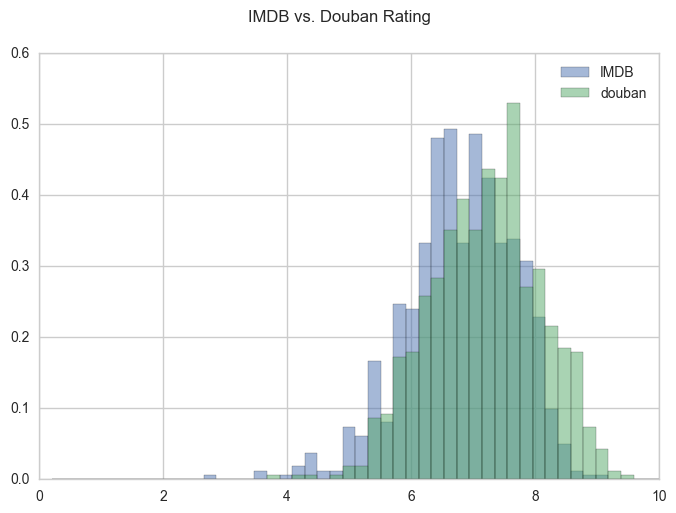

In [29]:
bins=linspace(0,10)
df['imdb_rating'].hist(bins=bins, alpha=0.5, normed=True, label = 'IMDB')
df['db_rating'].hist(bins=bins,alpha=0.5, normed=True, label = 'douban')
plt_configure(title='IMDB vs. Douban Rating', legend=True)

### 4.1.1 Best Movies

In [30]:
# df.sort_values(by='imdb_rating',ascending=False).head()
movie_list(df.sort_values(by='imdb_rating',ascending=False)[:20])

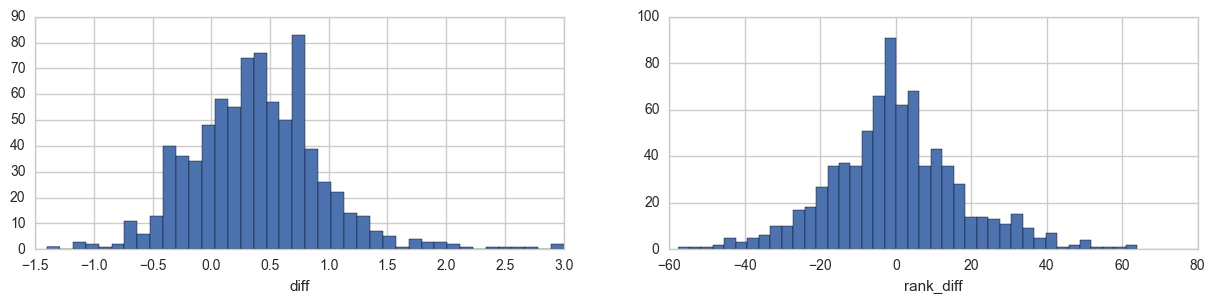

In [31]:
plt.subplot(1,2,1)
df['diff'].hist(bins=40,figsize=(15, 3))
plt.xlabel('diff')
plt.subplot(1,2,2)
df['rank_diff'].hist(bins=40)
plt.xlabel('rank_diff')

## 4.2 Scatter Comparison

 
0.7914 x + 1.107


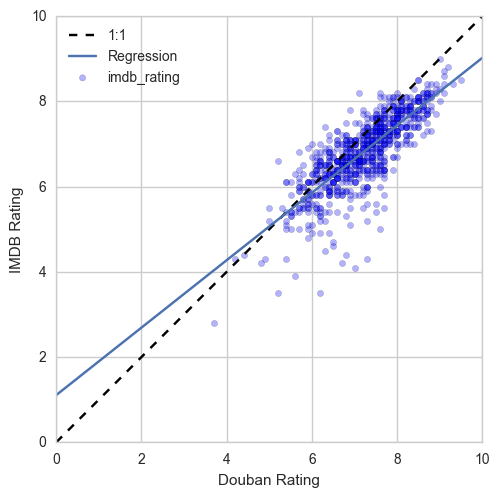

In [32]:
fig, fit_fn, scatter_plot = plot_movie_scatter_comparison(df, title='', type='rating')
print(fit_fn)

In [33]:
turn_scatter_into_interactive(fig, scatter_plot, df, 'movie_compare.html')

1. 对比前后scatter plot, 总体趋势是不变的
2. Play with the Scatter Plot， 看看有哪些电影差别很大:

    1. 回归线以上，IMDB >> 豆瓣；回归线以下，豆瓣 >> IMDB
    2. 总体而言，豆瓣评分确实更分散，(7,4.5)附近的一个cluster, 可以算作典型的偏离
    3. 这些偏离的电影，有何规律？

 
0.8113 x + 9.448


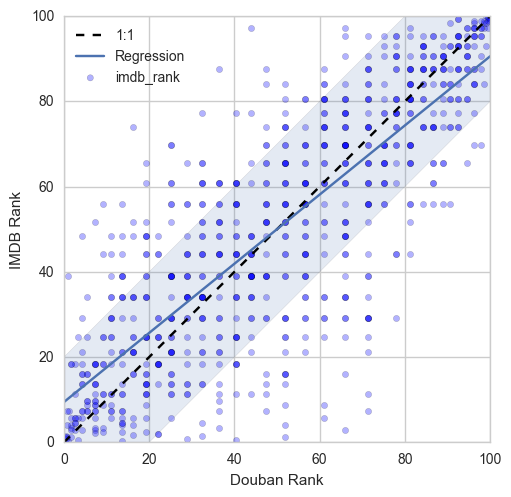

In [34]:
fig, fit_fn , scatter_plot = plot_movie_scatter_comparison(df, title='', type='rank')
print(fit_fn)

In [35]:
turn_scatter_into_interactive(fig, scatter_plot, df, 'movie_compare_rank.html')

## 4.3 Different Movies

以分位数为差别，是比较客观的看法

### 4.3.1 Rank Difference

In [36]:
movie_list(df.sort_values(by='rank_diff_abs',ascending=False))
# movie_list(df.sort_values(by='rank_diff',ascending=False))

### 4.3.2 Absolute Difference

In [37]:
# movie_list(df.sort_values(by='diff_abs',ascending=False))
# movie_list(df.sort_values(by='diff',ascending=True))

我观察到的规律: 似乎很多动画的评分，差别很大，例如：
1. 蓝精灵
2. Rio
3. 冰川时代
4. 疯狂原始人

那么，是不是存在某类电影，评分差别会很大？

接下来，按类别分析

# 5. Genre Comparison

In [38]:
sub_df = df[df['name'].str.contains("Eat Pray|Smurfs|Cars 2|Rio")]
movie_list(sub_df)

In [39]:
def category_overview(df, category_name, category):   
    sub_df = df[df[category_name].str.contains(category)]
    fig, fit_fn , scatter_plot = plot_movie_scatter_comparison(sub_df)
    print(category, len(sub_df), fit_fn)
    return len(sub_df)

In [40]:
for category in ["Romance", "Drama", "Action", 'Sci-Fi', 'Animation', 'Mystery', 'Crime', 'Adventure', 'Documentary', 'Comedy']:
    movie_number = category_overview(df, 'genre',category)
    plt_configure(title=category + ' (N: '+str(movie_number) +')')
    plt.gcf().set_size_inches(2.5,2.5)
align_figures()

Romance 131  
0.8253 x + 3.205
Drama 362  
0.7965 x + 11.43
Action 274  
0.8139 x + 11.27
Sci-Fi 101  
0.8082 x + 14.14
Animation 70  
0.9512 x - 5.168
Mystery 78  
0.8065 x + 11.97
Crime 120  
0.8537 x + 9.368
Adventure 217  
0.7847 x + 11.16
Documentary 9  
2.42 x - 144.1
Comedy 242  
0.8073 x + 3.032


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARcAAAEWCAYAAABMj9NxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzsnXlYlFX7xz/DwAw7KAgioOKSIAoioua+a7mkiZqpub5m
LpVlhVaWZa7V688l09TX8q3XNCQrU7NMbXHFfU0xZBGVRYaBGWZgZn5/TEwMzMAMDDDa87kuLuWc
55znnmdmvpzlPvct0ul0OgQEBARsjENdGyAgIPBwIoiLgIBAjSCIi4CAQI0giIuAgECNIIiLgIBA
jSCIi4CAQI0giIuAgECNIIiLgIBAjSCIi4CAQI0giEstMmHCBEJDQ41+wsLCiI6OZuTIkXzzzTd1
baJd8txzz/HVV18BsGbNGkJDQ/n0009NXhsXF0efPn2qdb9ly5YxYcKEcuV5eXm89dZbdO/enaio
KCZNmsSFCxfM9nPnzh1iYmI4efKkUfnq1atZtGhRtWx8EBDEpZZp3bo1O3bsMPx88cUXvPvuuzg6
OvLqq69y5MiRujbRrti1axd3794lNjYWAJFIBMCqVatITU0td71IJDJcUxW2bNnC1q1by/Wh0+l4
7rnnOHToEK+88gpr167F0dGRZ555hpSUlHL9ZGRkMGXKFPLz88vVTZ8+nYMHD3Ls2LEq2/kgIIhL
LePu7k5ERIThJyoqiscff5zNmzfj5OREQkJCXZtoN6hUKj744ANmzpxZrk4ikbBgwQKb3SstLY3Z
s2fz4Ycf4unpWa7+1KlTnD59mnfffZdhw4bRtWtX1q5di06nIz4+3nCdTqdj165djBgxgpycHJP3
cnZ2ZuLEiSxdutRm9tsjgrjYCRKJBIlEYvQXU61Ws27dOh577DEiIiIYOHAgn3zyCaXPmk6YMIGF
Cxeyfv16evToQbt27Zg+fTrZ2dnEx8czYMAAoqKimDx5Mrdv3za002q1bNy4kaFDhxIZGUlUVBRP
PfUUx48fN1yzdu1aBgwYwOHDhxk2bBht27Zl4MCB7N6928j2zMxMXnvtNbp06UL79u2ZMGECZ8+e
NdTrdDo2btzIgAEDDH3897//rfSZfPXVV6jVanr27GlULhKJiIuL4+TJk2zbtq3CPk6cOEFoaChf
f/11hdctXbqUlJQUtm7dSqtWrcrVt23blu3bt9O1a1dDmaOjIyKRCJVKZSi7du0ab7/9NiNGjGD5
8uWYOxc8ePBgrl+/zuHDhyu060HGsa4N+Keh0+nQaDSG3zUaDWlpaaxbtw6FQsETTzxhqHv22Wc5
f/48c+bMoVWrVhw7dswwHXjnnXcM1+3Zs4fw8HCWLFlCRkYGixYtYvz48Tg7OxMXF4dSqeSNN97g
nXfe4eOPPwZg5cqVbN++nXnz5tGqVSvu3r3L2rVreeGFFzh8+DBSqRTQC8e7777LzJkzCQgIYNOm
TcTFxREREUFISAgKhYKnnnoKnU7Hq6++ir+/P1u2bGHKlCl8/fXXNG7cmLfeeouEhARmzJhBVFQU
J06cYMmSJcjlcp577jmzz+rbb7+lZ8+eODk5lasbMWIEe/fu5cMPP6RXr14EBweb7CM8PJwdO3aY
rS9h7ty5tGjRwmy9s7MzkZGRgP49S01NZc2aNQCMHDnScF2jRo04cOAA/v7+nDhxwuwUzd/fn3bt
2hle48OIIC61zMmTJwkPDzcqE4lEtGrVitWrVxs+aIcPH+bo0aP8+9//5rHHHgPg0UcfxdnZmdWr
VzNx4kSaN28O6D/sH330Ee7u7gD88MMP/Prrr/z4448EBgYCcObMGaMF46ysLF5++WXGjRtnKJNI
JDz//PNcu3aNiIgIAAoLC3nvvffo1KkTAE2bNqV3794cPnyYkJAQdu3aRUZGBgkJCYa/+O3bt2f4
8OGcOHECrVbLzp07mTdvHlOnTgWgS5cuiEQiNmzYwNNPP42Xl1e551RQUMCFCxd4/PHHzT7Ld999
lyFDhrBgwQKzIxg3NzfDa6mIioSlLIsWLWLHjh2IRCKef/55WrZsaajz9PQ0Oa0yRdu2bdmzZ4/F
933QEKZFtUx4eDi7du0iPj6e9evX88gjjxASEsKqVavo37+/4bqTJ0/i6OjIoEGDjNoPGzYMnU7H
iRMnDGXNmjUzCAuAr68v9erVMwgLgLe3N3K53PD7ypUrGT9+PDk5OSQmJrJr1y6D+KjVaqN7tmvX
zvD/hg0bAqBQKAA4ffo0QUFBRlMJqVTK3r17iY2NNSxa9urVC41GY/jp3bs3hYWFnDp1yuRzysjI
QKPREBQUZPZZ+vv789prr3Hy5EmLplm2YvTo0Wzbto2pU6eyevVqVq9eXaV+AgMDyc7ONppWPUwI
I5daxs3NjdatWwN6oYmIiGDYsGFMnjyZhIQEvL29AZDJZNSrV6/csLpBgwYARkJRWlhKcHFxqdCO
CxcusGjRIi5evIiLiwstW7YkICAAoNw6QckUCf7erdFqtQDk5uZSv359s/fJzc1Fp9MxePDgcnUi
kYh79+6ZbFfy+ip7HbGxsezbt48PPvig1qYXbdq0ASAmJoacnBw2b97MrFmzEIvFVvVT8trkcrnR
M35YEMSljvHx8WHhwoW88MILLF68mPfffx8ALy8v7t+/j06nMxKYki9jvXr1qnzP/Px8/vWvfxEW
Fsb3339Ps2bNAP1U7IcffrCqLw8PD9LT08uVnzlzBk9PTzw8PBCJRHz22We4urqWu65E0MpS8vpK
i6g5Fi9ebJgelR6t2ZKkpCTOnTvHk08+aVQeHh5OQkICubm5+Pj4WNVnXl4eIpHI8AflYUOYFtkB
AwcOpHv37uzZs8cwTYiJiUGj0bB3716ja3fv3o1IJCI6OrrK97t58ya5ublMmDDBICyAwcemZFRi
CR06dCA1NZWkpCRDmUqlYs6cOcTHxxMTE4NOpyMnJ4fw8HDDT1ZWFqtWrSI3N9dkv/7+/ojFYjIy
Miq1oWHDhobp0U8//WSx7dZw4cIFFixYwLlz54zKf/nlF3x9fa0WFtA72fn6+uLo+HD+jX84X9UD
yIIFCxg6dCiLFy8mISGBnj170rFjR958803u3r1LaGgox48fZ9OmTYwYMcJIFKylZI3m448/RiwW
4+joyP79+w1esEql0uK+nnzySbZt28Zzzz3HnDlzqFevHp9++ilFRUWMHz+eRo0aMWzYMN58803S
0tJo06YNN2/eZNWqVQQHBxMSEmKyXxcXF9q3b09iYiITJ06s1I5Ro0axb98+fvvtN6MF1fz8fJKS
kggODq5w+lYZgwYNYsuWLbz00ku88MIL1K9fn2+++YbDhw+zYsUKs+0qClGdmJhI9+7dq2yTvSOM
XGoZc1uTISEhPPPMM1y7do0vvvgCgI0bNzJmzBg+/fRTnn32WX744QfmzZvHkiVLKu2zojJ3d3fW
r1+PTqfjxRdf5LXXXuPOnTt8/vnnuLm5GS2ymuunpNzNzY3PP/+cyMhIFi9ezNy5c9HpdGzbto1G
jRoBenf6yZMn8+WXXzJt2jQ2btzIkCFD2LJlS4XetAMHDuT48ePlFpjNtVm8eDHu7u5G9ZcvX+ap
p56y2vO57D2cnZ3ZunUrXbp04YMPPmDWrFkkJyezfv16hg4danE/JWRmZnLt2jXDTuDDiEiI/i9g
rxQWFtKvXz9eeeUVI/+fh4F169bx008/sWvXrro2pcawq5GLWq1m6NChRge90tLSmDx5MlFRUQwZ
MoTffvvNqM3vv//O0KFDadeuHZMmTTJ53kTgwcTZ2Zk5c+awZcuWCqcXDxoFBQVs376dl19+ua5N
qVHsRlzUajUvvfQSN27cMCqfNWsWfn5+xMfHM2zYMGbPns2dO3cAvS/ErFmzGDlyJPHx8dSrV49Z
s2bVhfkCNcS

可以发现，动画和其他类别，显著不同。具体画如下

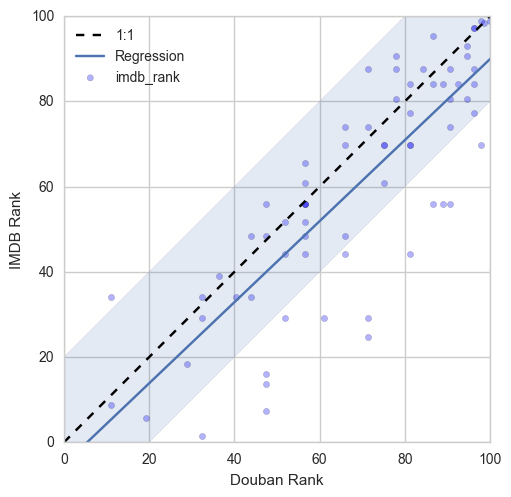

In [41]:
sub_df = df[df['genre'].str.contains('Animation')]
fig, _ , scatter_plot = plot_movie_scatter_comparison(sub_df)

In [42]:
turn_scatter_into_interactive(fig, scatter_plot, sub_df, 'animation_movies.html')

# 6. Country Comparison

In [43]:
for category in ["China", "USA", "India", 'German', 'Canada', 'UK']:
    movie_number = category_overview(df, 'country', category)
    plt_configure(title=category + ' (N: '+str(movie_number) +')')
    plt.gcf().set_size_inches(2.5,2.5)
align_figures()

China 25  
0.7759 x + 18.16
USA 686  
0.8074 x + 9.092
India 9  
0.7389 x + 17.47
German 58  
0.7992 x + 9.941
Canada 62  
0.851 x + 5.296
UK 159  
0.7498 x + 16.38


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARcAAAEWCAYAAABMj9NxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzsnXdc1PX/wJ+sOzYoijJExAWioOKeiaOcOSszS9PQ1MzM
SrMyzVX+8ltfNWdmmn01Z5mpmZaWmZoTFQcge3jscQvu7vfHxeXJOo47OPTzfDx6JO/PenHjyXu+
3lYajUaDgICAgImxru0ABAQEHk0EuQgICJgFQS4CAgJmQZCLgICAWRDkIiAgYBYEuQgICJgFQS4C
AgJmQZCLgICAWRDkIiAgYBYEudRhIiMjefvtt+nXrx+hoaEMHDiQDz74gKSkJL3zwsPDWbBgQYX3
WrBgAf379zdnuKU4duwYL7zwAgDJyckEBgYyduxY1Gp1qXPPnz9PYGAgFy5cqNIzlEolGzZsYPDg
wXTo0IGnnnqKdevWUVRUpHdenz59CAwM1PsvKCiInJwcAPbt28e0adOM/E0fT2xrOwAB49i5cycr
Vqyga9euzJs3D09PT+Li4tiyZQvHjh1j+/bttG7d2uD7zZgxg5deesmMEeuTlZXFkiVL+PLLL/XK
b9y4webNm8v8IltZWVX5OUuXLuXQoUPMnDmTtm3bcv36ddauXUtqaipLly4FIDs7m/v37zN//nw6
duyod72rqysAY8aMYefOnezfv5/Ro0dXOY7HEo1AnePvv//WtGnTRrNixYpSxzIzMzV9+vTRjB49
WlfWr18/zfz582syxEr56KOPNNOnT9f9nJSUpGndurWmS5cumnbt2mmio6P1zj937pwmMDBQc/78
eYOfkZ2drQkMDNRs3bpVr3zTpk2awMBATVZWlkaj0Wj+/PNPTWBgoCYxMbHC+x09elTTo0cPjUKh
MDiGxxmhWVQH+fLLL3F1deWNN94odax+/fosWLCAAQMGIJfLdeXFxcWsWrWKXr160aFDB6ZMmUJC
QoLu+Pz58wkPD9f9HB4ezpo1a/jkk0/o2bMnoaGhTJ06lfj4eL3n7dmzhzFjxtChQwdCQ0MZOXIk
R48erTD+rKws9u3bx/Dhw0sdmzZtGs7OzsyfPx9NJWtqw8PDefHFF8s9XlBQwPjx4+nXr59eeUBA
AACJiYkAREVF4eTkhK+vb4XP69evHwqFgr1791Z4noAWQS51kDNnztC9e3fEYnGZx5966ileffVV
7O3tdWWHDx8mOjqajz/+mEWLFnH9+nXmzp2rO25lZVWq2bF9+3ZiY2NZuXIly5Yt4/r167zzzju6
4zt37mTRokUMGjSITZs28emnnyIWi5k3bx7p6enlxv/zzz9TXFxc6ksPWjm+//77REZGsnnz5gpf
hy+++IJFixaVe9zX15cPPvgAf39/vfJffvkFW1tbmjVrBmjl4urqyuzZs+nUqRMdOnTgjTfeQCKR
6F0nEono168fhw4dqjAuAS1Cn0sdIysrC4VCUelf2Ydp3LgxX3zxBTY2NgDEx8ezYcMGCgsLcXJy
KvMaNzc31q9fr5NOfHw8a9euJTc3Fzc3N5KSknjllVf0+ke8vb0ZPXo0Fy9eZMiQIWXe99y5c7Ro
0QIHB4cyjw8ePJgjR46wbt06+vfvT/Pmzcs8LzAw0ODfv4Tjx49z8OBBJk6ciIuLCwC3bt3i/v37
tG3blpdeeonY2Fg+//xzJk6cyMGDB/Uk3a5dO44cOYJUKsXR0bHKz3+cEORSx7C11b5lKpWqSteF
hIToxALo5JSfn1+uXNq1a6dXm2ncuDEAMpkMNzc3XS0mPz+f2NhY4uPjOXfuHFZWViiVynJjSUxM
rFSOH374IUOGDGHBggXs3r3bsF+yEn7++WfmzZtHp06dmDdvnq586dKl2NjY0LZtWwDCwsJo3rw5
zz//PAcPHuS5557Tnevj44NKpSI1NbVc6QloEZpFdQxXV1ecnJxISUkp9xyZTEZeXp5e2cO1BGtr
7Vtf1rBvCQ/+xS7rmoSEBCZNmkTnzp2ZOHEiW7duNUh6+fn55dZaSihpHl27do0tW7YAVNoHUxHb
tm1jzpw5dOrUiY0bNyISiXTHQkNDdWIpoWPHjri4uHDr1i298pLaSkFBgdGxPC4IcqmD9OrVi3Pn
zpVbO9i9ezfdunUjKirKbDFoNBoiIiLIzs5m//79XLlyhYMHD/LKK69UKoF69eqVkl9ZDB06lAED
BrB27VpiYmKMGooGbc1k5cqVDB06lE2bNuk1ZwoKCti3bx93794t9fsVFRVRv359vfLc3Fzd7yBQ
MYJc6iAvv/wy2dnZfPbZZ6WOSSQSvvrqK1q2bElQUJDZYsjOziYuLo6xY8fSpk0bXa3m1KlTWFlZ
VVgj8vHxIS0tzaDnLF68GHt7e1avXm1UnJ9++inffPMNL7/8MqtWrdI1K0sQiUR89NFHbNq0Sa/8
xIkTKBQKunXrpleelpaGjY0NjRo1Miqexwmhz6UOEhoayuuvv87nn39OTEwMI0eOpF69ety5c4et
W7eiVCrLFI8pqV+/Pj4+PnzzzTc0atQIV1dXTp8+zfbt2wFt06w8evbsydGjRykoKMDZ2bnC53h4
ePDee+/x1ltvlaq5REVFIRKJyu37iIqKYsuWLYSEhPDkk09y9epVveMtWrTAycmJV155hbVr1+Lh
4UHfvn25ffs2a9euZcCAAXTp0kXvmkuXLtGpU6dyR+oE/kWQSx1l+vTpBAcH62bq5ubm0rhxY8LD
w5k2bZreX9ayhpnL4sFzDLnmiy++YNmyZSxYsACRSESLFi3YuHEjy5cv5++//2bChAllXtevXz9s
bW35/fffGTx4cJnPf5Dhw4dz5MgRfv31V73ymTNn4uvrqxPawxw/fhzQLpN4sFO2hO3bt9O5c2dm
zpyJh4cHO3fuZNeuXbi7u/P8888za9YsvfOVSiXnzp3TG8IXKB8rTXV6yQQEjGTp0qVER0ezbdu2
2g7FYA4ePMinn37KiRMn9DqEBcrGovpclEolw4cP11uclpSUxOTJk+nQoQPDhg3jzJkzetf8+eef
DB8+nPbt2zNp0iTdrEsBy2b69OlERUURGRlZ26EYhEaj4auvvmL27NmCWAzEYuSiVCqZO3cu0dHR
euUzZ87E09OTffv2MWLECGbNmqXrDExNTWXmzJmMGTOGffv2Ua9ePWbOnFkb4QtUkQYNGrBo0SKW
L19e26EYxN69e/H09GTcuHG1HUrdofaWNf1LdHS05umnn9Y8/fTTeovT/vzzT02HDh00crlcd+6k
SZM0a9as0Wg0Gs1nn32mmThxou6YTCbTdOzYsUqL2wQEBMyDRdRczp8/T/fu3dm9e7feHIlr164R
HBys1zMfFhbGlStXdMc7d+6sO2Zvb0+bNm24fPlyzQUvICBQJhYxWjR+/PgyyyUSCZ6ennplHh4e
ukVx9+/fL3W8QYMGFS6aExAQqBksouZSHjKZrFTnmUgk0s1MlcvlFR4XEBCoPSyi5lIeYrFYN926
BKVSqVvzIhaLS4lEqVTqsodVRnFxMbm5uYjFYt0MUwGBxw21Wo1CocDNza3UDObqYNFyadSoUanR
o4yMDBo2bKg7/nDOjYyMDIOnvefm5hIXF2eSWAUE6jr+/v54eHiY7H4WLZfQ0FA2b96MUqnUNX8u
XrxIp06ddMcvXbqkO18mk3Hz5k1ee+01g+5f0lHcoEGDSqeh1zQKhYLU1FS8vLwsaqq5pcYFlhtb
QaGUjOxCsnNyaOTZqNbnyUgk93l/wZukpmpX1k+f8Rq9e3Yz+Wtm0XLp0qULXl5ezJ8/nxkzZnDy
5EkiIyNZuXIloE2avHXrVjZv3ky/fv1Yu3Ytfn5+pdaDlEdJU8jZ2dmkxjYFUqmU1NRU3N3dLSop
kaXGBZYZW25

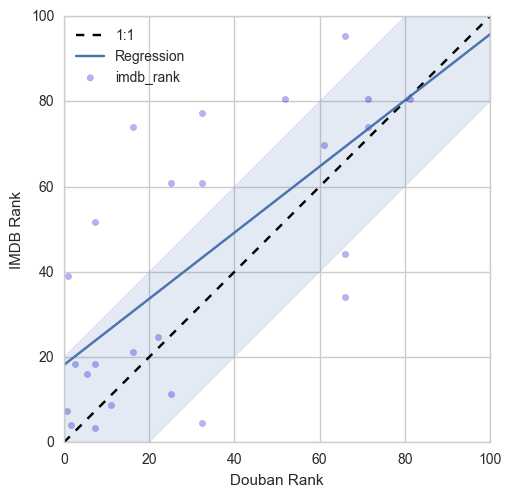

In [44]:
country = 'China'
sub_df = df[df['country'].str.contains(country)]
fig, _ , scatter_plot = plot_movie_scatter_comparison(sub_df)

In [45]:
turn_scatter_into_interactive(fig, scatter_plot, sub_df, 'chinese_movies.html')

In [46]:
movie_list(sub_df.sort_values(by='rank_diff_abs',ascending=False))

整体而言，其实评价有好有坏。
- 大部分略微偏低，但总体一致。可以认为是文化差异，东方文化魅力在国外会有加成
- 好的电影，像叶问一致评价都是较高的。
- 另外也存在一些文化差异，导致评分有明显差别的，比如让子弹飞、一代宗师

In [47]:
sub_df = df[df['name'].str.contains("Shaolin|Grandmasters|Bullets|Ip Man")]
movie_list(sub_df)